In [14]:
import matplotlib.pyplot as plt
import numpy as np
import cvxpy as cp
from numpy import linalg as la
from scipy import optimize
import matplotlib.patches as mpatches
import time

In [3]:
def predictedClass(point, w, b):
    p = np.mat(point)
    f = p * w + b
    if f > 0:
        print(point, "belongs to Class 1")
    else:
        print(point, "belongs to Class -1")

In [4]:
def compute_b_n(w, x, y):
    s_p = 0
    for i in range(x.shape[0]):
        s_p += w[i, 0] * x[i]

    return y - s_p

In [18]:
def plotLinearClassifier(point, w, alphas, b, dataX, labelY):
    Y = np.array(labelY)
    X = np.array(dataX)
    svmMat = []
    alphaMat = []
    for i in range(Y.shape[0]):
        alphaMat.append(alphas[i])
        if alphas[i]>0.000001:
            svmMat.append(X[i])
                                
    svmPoints = np.array(svmMat)
    alphasArr = np.array(alphaMat)

    numofSVMs = np.shape(svmPoints)[0]
    print("Number of SVM points: %d" % numofSVMs)

    xSVM = []
    ySVM = []
    for i in range(numofSVMs):
        xSVM.append(svmPoints[i,0])
        ySVM.append(svmPoints[i,1])    
    
    n = np.shape(X)[0]    
    xcord1 = []
    ycord1 = []
    xcord2 = []
    ycord2 = []
    
    for i in range(n):
        if int(labelY[i])== 1:
            xcord1.append(X[i,0])
            ycord1.append(X[i,1])                  
        else:
            xcord2.append(X[i,0])
            ycord2.append(X[i,1])                  

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s=30, c='purple', marker='s')
    
    ax.scatter(xcord2, ycord2, s=30, c='orange')
    
    red_patch = mpatches.Patch(color='purple', label='Class 1')
    green_patch = mpatches.Patch(color='orange', label='Class -1')
    plt.legend(handles=[red_patch,green_patch])

    x_min = min(point[0], min(dataX, key=lambda t: t[0])[0])
    x_max = max(point[0], max(dataX, key=lambda t: t[0])[0])
    
    x = []
    y = []
    for xfit in np.linspace(x_min, x_max):
        x.append(xfit)
        y.append(float((-w[0] / w[1]) * xfit - b[0, 0] / w[1]))
            
    ax.plot(x,y)
    
    predictedClass(point, w, b)
    p = np.mat(point)
    ax.scatter(p[0,0], p[0,1], s=30, c='black', marker='s')
    circle1=plt.Circle((p[0,0],p[0,1]),0.6, color='b', fill=False)
    plt.gcf().gca().add_artist(circle1)
    
    plt.show()

In [19]:
def loadDataSet(fileName):
    dataX = []
    labelY = []
    fr = open(fileName)
    for r in fr.readlines():
        record = r.strip().split()
        dataX.append([float(record[0]), float(record[1])])
        labelY.append(float(record[2]))
    return np.array(dataX), np.array(labelY)

In [20]:
def computeW(alphas, dataX, classY):
    X = np.mat(dataX)
    Y = classY
    m, n = np.shape(X)
    w = np.zeros((n, 1))

    for i in range(m):
        w += np.multiply(alphas[i] * Y[i], X[i,:].T)
    return w

1.0475178756152987
1e-06
0.15696716640183048
1e-06
0.09149553749516184
1e-06
0.06540904514577507
1e-06
0.044400118805927265
1e-06
0.016212718932850236
1e-06
0.01501153522657096
1e-06
0.014054574663981367
1e-06
0.01316148425974747
1e-06
0.012326386098952287
1e-06
0.011545663921394729
1e-06
0.010813798362794003
1e-06
0.010125932538639307
1e-06
0.009477625710554027
1e-06
0.008873807877154796
1e-06
0.008308943504596364
1e-06
0.007780176867476907
1e-06
0.007284823893857423
1e-06
0.006820894409796499
1e-06
0.00638641031511352
1e-06
0.0059794994479631935
1e-06
0.005598411779887616
1e-06
0.005241513752893558
1e-06
0.004907281932583611
1e-06
0.004594296316136236
1e-06
0.00430400822801493
1e-06
0.004031964242144526
1e-06
0.003777540231450389
1e-06
0.003539614173191292
1e-06
0.0033175380712832806
1e-06
0.0031037533575211116
1e-06
0.002903333691320659
1e-06
0.0027199814116943854
1e-06
0.002546890384644958
1e-06
0.0023848334039358035
1e-06
0.002233107515581115
1e-06
0.00209103680407333
1e-06
0.0019

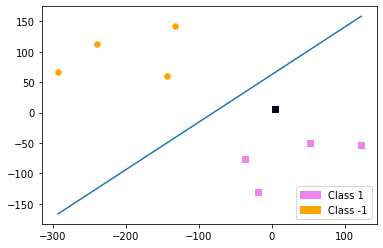

In [21]:
x_train, y_train = loadDataSet('./dataset/dataset0.txt')

n, d = x_train.shape
q = -1. * np.ones((n, 1))

y_train = np.expand_dims(y_train, axis=1)*1.
P = (y_train * x_train).dot((y_train * x_train).T)
C = 0.5
f = lambda x: 0.5 * x.T @ P @ x + q.T @ x

def Proj(t_alpha, y_train = y_train, C = C):
    n = t_alpha.shape[0]

    x = cp.Variable((n, 1))
    # print (x.value)
    constraints = []
    constraints.append(x >= 0)
    constraints.append(x <= C)
    constraints.append(cp.sum(cp.multiply(x, y_train)) == 0)

    obj = cp.Minimize(cp.norm(x - t_alpha, 2))
    problem = cp.Problem(obj, constraints)

    problem.solve(solver='CVXOPT')
    return x.value

start = time.time()
### Constanta Lipschitz a gradientului
Lips = np.max(la.eigvals(P))
eta = 1 / Lips

x00 = np.array(70 * np.random.rand(x_train.shape[0], 1))
x0 = Proj(x00)

x_old = x0
x = Proj(x_old - eta * (P @ x_old + q))

criteriu_stop = la.norm(x - x_old)

k = 0
eps = 10e-4
while (criteriu_stop > eps**2):
    print(criteriu_stop)
    print(eps**2)
    x_old = x
    
    ## Pas gradient
    grad = P @ x + q
    y = x - eta * grad
    
    ## Pas proiectie
    x = Proj(y)
    
    criteriu_stop = la.norm(x - x_old)
    k = k + 1

solMGP = x      

print (k)
print (solMGP)

w = computeW(solMGP, x_train, y_train)
print (w)

b_n = []
for i in range(n):
    if solMGP[i] < 0.000001:
        continue

    b_n.append(compute_b_n(w, x_train[i,:], y_train[i]))

b = np.median(b_n)
print (b)
end = time.time()
print("------------TIME---------------")
print(end - start)
b = np.array([[b]])

# #### Plot ####
plotLinearClassifier([4, 5], w, solMGP, b, x_train, y_train)